<a href="https://colab.research.google.com/github/greengerong/awesome-llm/blob/main/colab/sdxl/SDXL_Lightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 环境设置

In [2]:
!pip3 install -q bitsandbytes peft trl accelerate datasets transformers
!pip3 install -q diffusers matplotlib

# 推理

## 2-Step, 4-Step, 8-Step UNet

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all o

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

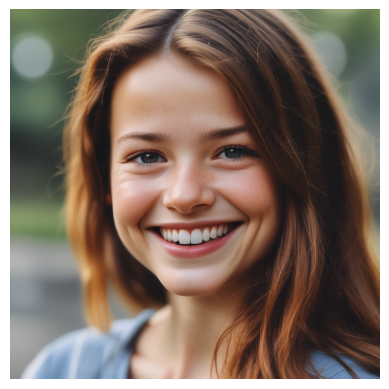

In [2]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_4step_unet.safetensors" # Use the correct ckpt for your step setting!

# Load model.
unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")

# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("A girl smiling", num_inference_steps=4, guidance_scale=0).images[0].save("output.png")

img = mpimg.imread("output.png")
plt.imshow(img)
plt.axis('off')
plt.show()


## 2-Step, 4-Step, 8-Step LoRA

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

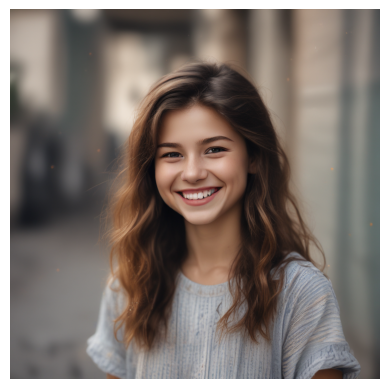

In [2]:
import torch
from diffusers import StableDiffusionXLPipeline, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_4step_lora.safetensors" # Use the correct ckpt for your step setting!

# Load model.
pipe = StableDiffusionXLPipeline.from_pretrained(base, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.load_lora_weights(hf_hub_download(repo, ckpt))
pipe.fuse_lora()

# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("A girl smiling", num_inference_steps=4, guidance_scale=0).images[0].save("output.png")

img = mpimg.imread("output.png")
plt.imshow(img)
plt.axis('off')
plt.show()


## 1-Step UNet

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all o

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

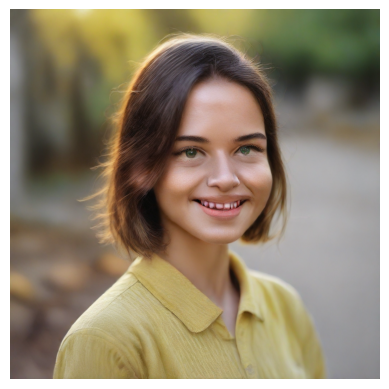

In [1]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_1step_unet_x0.safetensors" # Use the correct ckpt for your step setting!

# Load model.
unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")

# Ensure sampler uses "trailing" timesteps and "sample" prediction type.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing", prediction_type="sample")

# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("A girl smiling", num_inference_steps=1, guidance_scale=0).images[0].save("output.png")

img = mpimg.imread("output.png")
plt.imshow(img)
plt.axis('off')
plt.show()